<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.466699,36.688102,34.763765,-37.829074,117.089492,152.121928,-35.032437
1,0.0,1.0,25.127470,94.723578,60.208865,107.959614,298.019527,171.747402,126.272125
2,0.0,2.0,95.297427,27.863240,54.090153,-30.836976,156.413844,196.340791,-39.926947
3,0.0,3.0,51.497895,64.613343,73.168712,-19.532074,179.747875,196.985491,-17.237616
4,0.0,4.0,73.168877,95.460996,96.180400,-20.111309,254.698965,275.817865,-21.118900
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.338729,67.590857,40.947851,-27.266377,176.611061,201.759745,-25.148684
119996,999.0,116.0,70.800647,77.274226,46.863251,-88.420784,116.517340,201.128770,-84.611430
119997,999.0,117.0,65.124964,48.880826,38.027539,-14.604625,147.428705,165.506528,-18.077823
119998,999.0,118.0,56.513612,34.757657,54.965269,8.824139,165.060676,158.168365,6.892311


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.466699,36.688102,34.763765,-37.829074,117.089492,152.121928,-35.032437
1,0.0,1.0,25.127470,94.723578,60.208865,107.959614,298.019527,171.747402,126.272125
2,0.0,2.0,95.297427,27.863240,54.090153,-30.836976,156.413844,196.340791,-39.926947
3,0.0,3.0,51.497895,64.613343,73.168712,-19.532074,179.747875,196.985491,-17.237616
4,0.0,4.0,73.168877,95.460996,96.180400,-20.111309,254.698965,275.817865,-21.118900
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.338729,67.590857,40.947851,-27.266377,176.611061,201.759745,-25.148684
119996,999.0,116.0,70.800647,77.274226,46.863251,-88.420784,116.517340,201.128770,-84.611430
119997,999.0,117.0,65.124964,48.880826,38.027539,-14.604625,147.428705,165.506528,-18.077823
119998,999.0,118.0,56.513612,34.757657,54.965269,8.824139,165.060676,158.168365,6.892311


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.466699,36.688102,34.763765,-37.829074,117.089492,152.121928,-35.032437
1,0.0,1.0,25.127470,94.723578,60.208865,107.959614,298.019527,171.747402,126.272125
2,0.0,2.0,95.297427,27.863240,54.090153,-30.836976,156.413844,196.340791,-39.926947
3,0.0,3.0,51.497895,64.613343,73.168712,-19.532074,179.747875,196.985491,-17.237616
4,0.0,4.0,73.168877,95.460996,96.180400,-20.111309,254.698965,275.817865,-21.118900
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.338729,67.590857,40.947851,-27.266377,176.611061,201.759745,-25.148684
119996,999.0,116.0,70.800647,77.274226,46.863251,-88.420784,116.517340,201.128770,-84.611430
119997,999.0,117.0,65.124964,48.880826,38.027539,-14.604625,147.428705,165.506528,-18.077823
119998,999.0,118.0,56.513612,34.757657,54.965269,8.824139,165.060676,158.168365,6.892311


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    73.466699  36.688102  34.763765  -37.829074  117.089492   
      1.0    25.127470  94.723578  60.208865  107.959614  298.019527   
      2.0    95.297427  27.863240  54.090153  -30.836976  156.413844   
      3.0    51.497895  64.613343  73.168712  -19.532074  179.747875   
      4.0    73.168877  95.460996  96.180400  -20.111309  254.698965   
...                ...        ...        ...         ...         ...   
999.0 115.0  85.338729  67.590857  40.947851  -27.266377  176.611061   
      116.0  70.800647  77.274226  46.863251  -88.420784  116.517340   
      117.0  65.124964  48.880826  38.027539  -14.604625  147.428705   
      118.0  56.513612  34.757657  54.965269    8.824139  165.060676   
      119.0  68.927702  41.764053  45.530030   17.751748  183.973534   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    152.121928  -35.032437  
      1.0    171.747402  126.272125  
      2.0    196.340791  -39.926947  
      3.0    196.985491  -17.237616  
      4.0    275.817865  -21.118900  
...                 ...         ...  
999.0 115.0  201.759745  -25.148684  
      116.0  201.128770  -84.611430  
      117.0  165.506528  -18.077823  
      118.0  158.168365    6.892311  
      119.0  168.419197   15.554337  

[120000 rows x 7 columns]

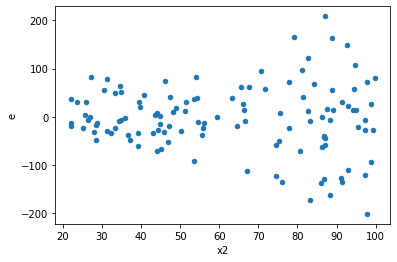

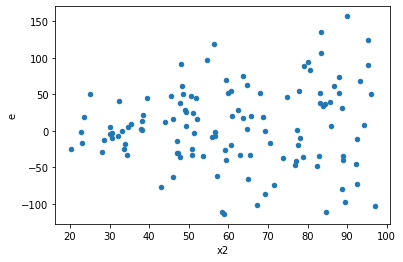

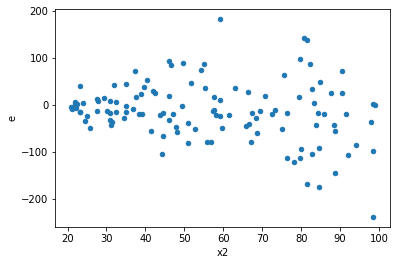

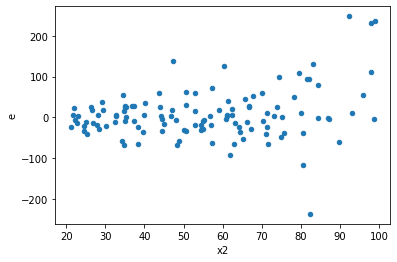

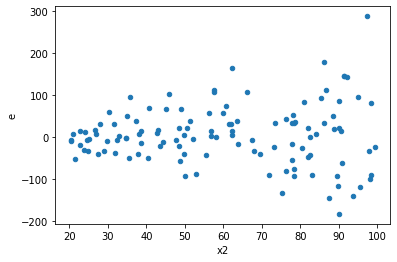

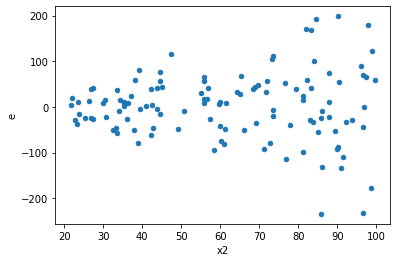

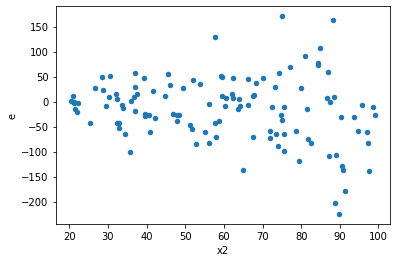

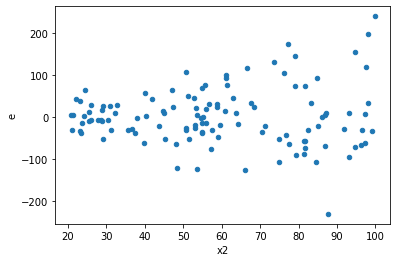

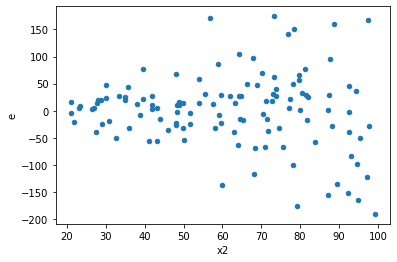

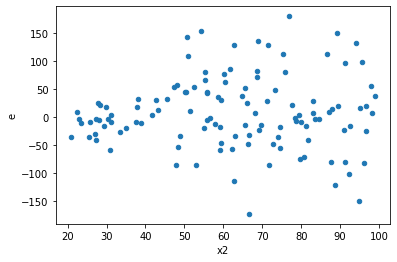

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,142027.55828238785,383277.2279763705,3156.1679618308413,8517.271732808233,2.6986116822082886,0.0011654661266111699,0.9994172669366944,0.0005827330633055849,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,76139.47269498139,149770.14192247385,1691.9882821106976,3328.2253760549743,1.9670498970023167,0.025369231831977146,0.9873153840840114,0.012684615915988573,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,92847.57466930375,280186.91432665975,2063.279437095639,6226.375873925772,3.017708489689737,0.0003220779420869402,0.9998389610289565,0.0001610389710434701,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,38131.63158478621,303403.52891691896,847.369590773027,6742.300642598199,7.956741327532681,1.389697246167998e-10,0.9999999999305151,6.94848623083999e-11,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,123991.90334050663,386612.35965324304,2755.3756297890363,8591.385770072067,3.118045204867353,0.00021701543090801856,0.999891492284546,0.00010850771545400928,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,115443.80327495415,298228.6512759763,2565.4178505545365,6627.303361688363,2.583323165173976,0.0018746130251021675,0.9990626934874489,0.0009373065125510838,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,148277.40260725247,178540.53014965204,3295.053391272277,3967.5673366589344,1.2040980419825573,0.5358721681991698,0.7320639159004151,0.2679360840995849,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,69854.64795947706,348147.8686499074,1552.3255102106014,7736.619303331276,4.983889817208287,3.2811810712907175e-07,0.9999998359409464,1.6405905356453587e-07,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,125746.74079467778,221669.0722166463,2794.372017659506,4925.979382592141,1.7628216112463129,0.060300257174800365,0.9698498714125998,0.030150128587400182,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,142027.55828238785,383277.2279763705,3156.1679618308413,8517.271732808233,2.6986116822082886,0.0011654661266111699,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,76139.47269498139,149770.14192247385,1691.9882821106976,3328.2253760549743,1.9670498970023167,0.025369231831977146,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,92847.57466930375,280186.91432665975,2063.279437095639,6226.375873925772,3.017708489689737,0.0003220779420869402,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,38131.63158478621,303403.52891691896,847.369590773027,6742.300642598199,7.956741327532681,1.389697246167998e-10,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,123991.90334050663,386612.35965324304,2755.3756297890363,8591.385770072067,3.118045204867353,0.00021701543090801856,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,115443.80327495415,298228.6512759763,2565.4178505545365,6627.303361688363,2.583323165173976,0.0018746130251021675,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,148277.40260725247,178540.53014965204,3295.053391272277,3967.5673366589344,1.2040980419825573,0.5358721681991698,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,69854.64795947706,348147.8686499074,1552.3255102106014,7736.619303331276,4.983889817208287,3.2811810712907175e-07,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,125746.74079467778,221669.0722166463,2794.372017659506,4925.979382592141,1.7628216112463129,0.060300257174800365,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      511
Reject001=0 : Heteroscedasticity    489
Name: Result_test, dtype: int64